In [2]:
n=500

# andrii0

In [3]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Path to your training_statistics.json file
stats_path = 'runs/data/andrii0_wd0.0001_dr0.1_rTEMP/training_statistics.json'

with open(stats_path, 'r') as f:
    andrii0_stats = json.load(f)

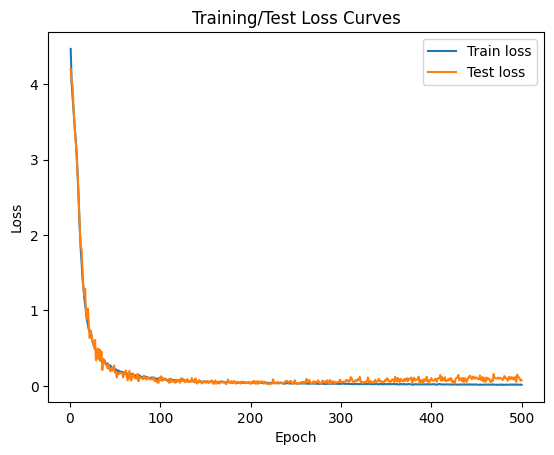

In [4]:
# Extract loss per batch or per epoch
andrii0_batch_losses = [entry['batch_loss'] for entry in andrii0_stats if 'batch_loss' in entry]
andrii0_test_losses = [entry['test_loss'] for entry in andrii0_stats if 'test_loss' in entry]
andrii0_batch_losses = np.reshape(andrii0_batch_losses[:(n*91)], (n, 91))

plt.plot(np.arange(1, n+1), andrii0_batch_losses.mean(axis=1), label='Train loss')
plt.plot(np.arange(1, n+1), andrii0_test_losses[:n], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Test Loss Curves')
plt.legend()
plt.show()

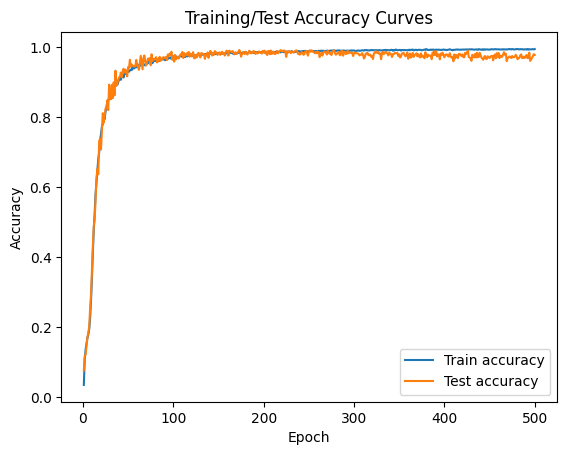

In [5]:
# Accuracies
andrii0_train_accuracies = [(entry['train_accuracy_a'] + entry['train_accuracy_b']) / 2 for entry in andrii0_stats if 'train_accuracy_a' in entry]
andrii0_test_accuracies = [(entry['test_accuracy_a'] + entry['test_accuracy_b']) / 2 for entry in andrii0_stats if 'test_accuracy_a' in entry]

plt.plot(np.arange(1, n+1), andrii0_train_accuracies[:n], label='Train accuracy')
plt.plot(np.arange(1, n+1), andrii0_test_accuracies[:n], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Test Accuracy Curves')
plt.legend()
plt.show()

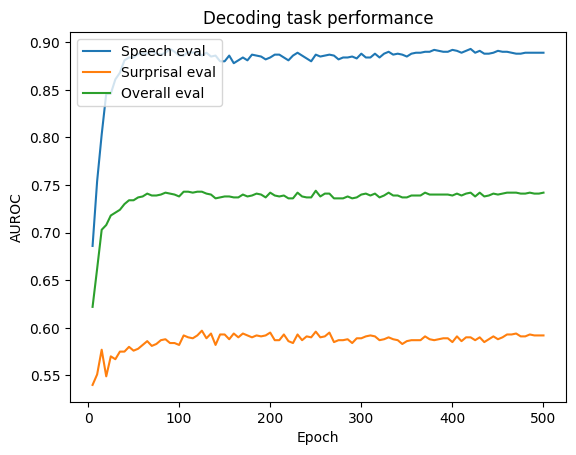

In [6]:
# Extract loss per batch or per epoch
andrii0_speech_evals = [entry['eval_auroc/average_speech'] for entry in andrii0_stats if 'eval_auroc/average_overall' in entry and entry['epoch'] <= n]
andrii0_surprisal_evals = [entry['eval_auroc/average_gpt2_surprisal'] for entry in andrii0_stats if 'eval_auroc/average_overall' in entry and entry['epoch'] <= n]
andrii0_overall_evals = [entry['eval_auroc/average_overall'] for entry in andrii0_stats if 'eval_auroc/average_overall' in entry and entry['epoch'] <= n]

plt.plot(np.arange(5, n+1, 5), andrii0_speech_evals, label='Speech eval')
plt.plot(np.arange(5, n+1, 5), andrii0_surprisal_evals, label='Surprisal eval')
plt.plot(np.arange(5, n+1, 5), andrii0_overall_evals, label='Overall eval')
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.title('Decoding task performance')
plt.legend()
plt.show()

# roshnipm_pair

In [7]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Path to your training_statistics.json file
stats_path = 'runs/data/roshnipm_pair_nocommon_wd0.0001_dr0.1_rTEMP/training_statistics.json'

with open(stats_path, 'r') as f:
    roshnipm_stats = json.load(f)

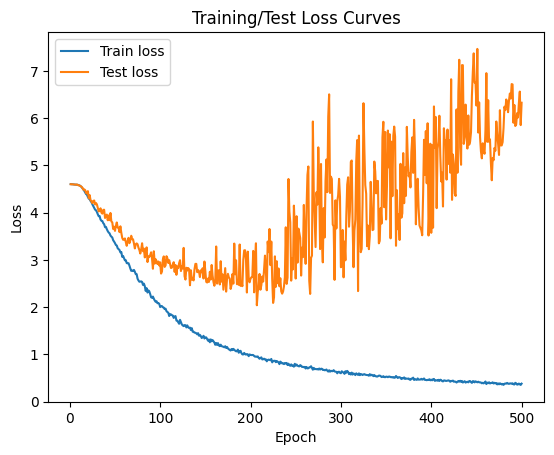

In [8]:
# Extract loss per batch or per epoch
roshnipm_batch_losses = [entry['batch_loss'] for entry in roshnipm_stats if 'batch_loss' in entry]
roshnipm_test_losses = [entry['test_loss'] for entry in roshnipm_stats if 'test_loss' in entry]
roshnipm_batch_losses = np.reshape(roshnipm_batch_losses[:(n*120)], (n, 120))

plt.plot(np.arange(1, n+1), roshnipm_batch_losses.mean(axis=1), label='Train loss')
plt.plot(np.arange(1, n+1), roshnipm_test_losses[:n], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Test Loss Curves')
plt.legend()
plt.show()

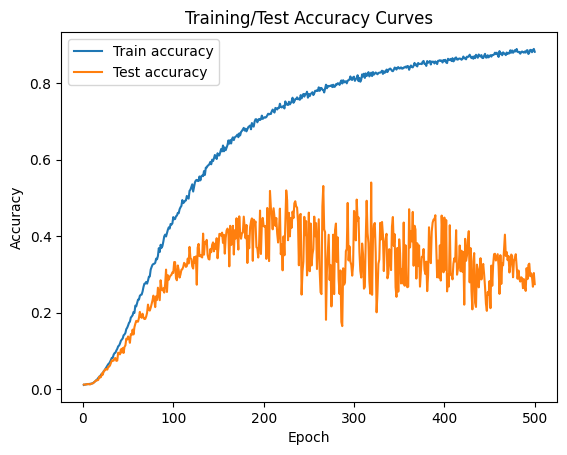

In [9]:
# Accuracies
roshnipm_train_accuracies = [(entry['train_accuracy_a'] + entry['train_accuracy_b']) / 2 for entry in roshnipm_stats if 'train_accuracy_a' in entry]
roshnipm_test_accuracies = [(entry['test_accuracy_a'] + entry['test_accuracy_b']) / 2 for entry in roshnipm_stats if 'test_accuracy_a' in entry]

plt.plot(np.arange(1, n+1), roshnipm_train_accuracies[:n], label='Train accuracy')
plt.plot(np.arange(1, n+1), roshnipm_test_accuracies[:n], label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Test Accuracy Curves')
plt.legend()
plt.show()

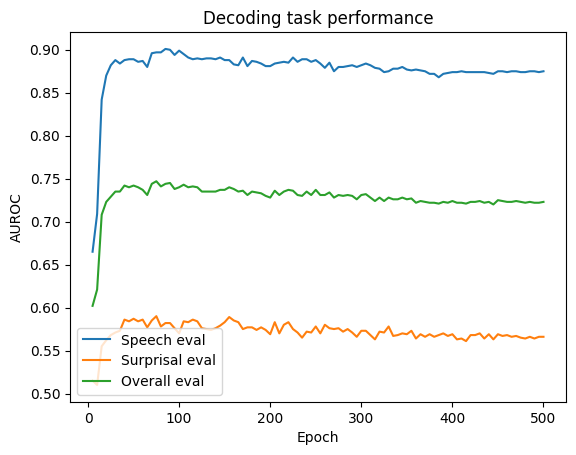

In [10]:
# Extract loss per batch or per epoch
roshnipm_speech_evals = [entry['eval_auroc/average_speech'] for entry in roshnipm_stats if 'eval_auroc/average_overall' in entry and entry['epoch'] <= n]
roshnipm_surprisal_evals = [entry['eval_auroc/average_gpt2_surprisal'] for entry in roshnipm_stats if 'eval_auroc/average_overall' in entry and entry['epoch'] <= n]
roshnipm_overall_evals = [entry['eval_auroc/average_overall'] for entry in roshnipm_stats if 'eval_auroc/average_overall' in entry and entry['epoch'] <= n]

plt.plot(np.arange(5, n+1, 5), roshnipm_speech_evals, label='Speech eval')
plt.plot(np.arange(5, n+1, 5), roshnipm_surprisal_evals, label='Surprisal eval')
plt.plot(np.arange(5, n+1, 5), roshnipm_overall_evals, label='Overall eval')
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.title('Decoding task performance')
plt.legend()
plt.show()

# comparison

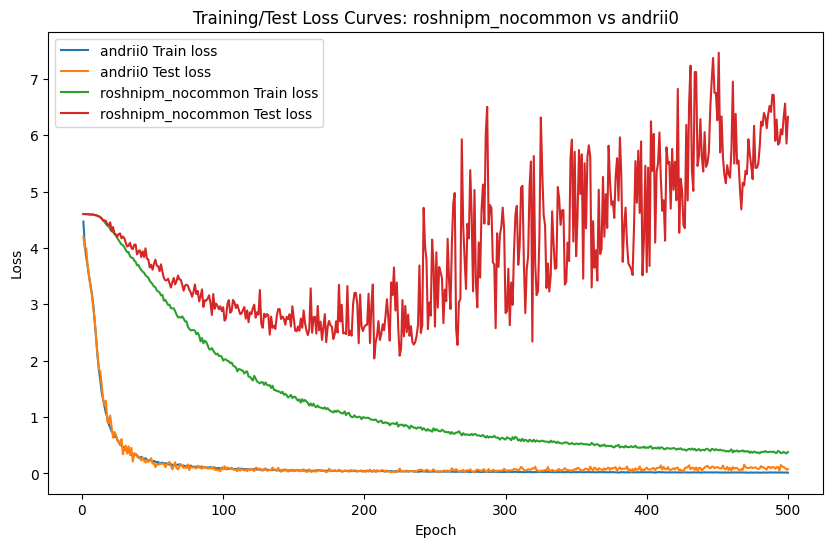

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n+1), andrii0_batch_losses.mean(axis=1), label='andrii0 Train loss')
plt.plot(np.arange(1, n+1), andrii0_test_losses[:n], label='andrii0 Test loss')
plt.plot(np.arange(1, n+1), roshnipm_batch_losses.mean(axis=1), label='roshnipm_nocommon Train loss')
plt.plot(np.arange(1, n+1), roshnipm_test_losses[:n], label='roshnipm_nocommon Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training/Test Loss Curves: roshnipm_nocommon vs andrii0')
plt.legend()
plt.show()

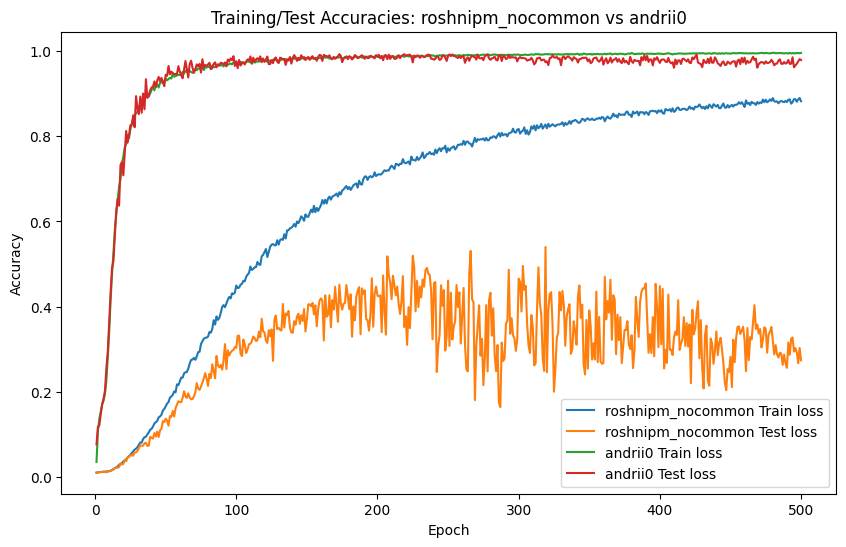

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n+1), roshnipm_train_accuracies[:n], label='roshnipm_nocommon Train loss')
plt.plot(np.arange(1, n+1), roshnipm_test_accuracies[:n], label='roshnipm_nocommon Test loss')
plt.plot(np.arange(1, n+1), andrii0_train_accuracies[:n], label='andrii0 Train loss')
plt.plot(np.arange(1, n+1), andrii0_test_accuracies[:n], label='andrii0 Test loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training/Test Accuracies: roshnipm_nocommon vs andrii0')
plt.legend()
plt.show()

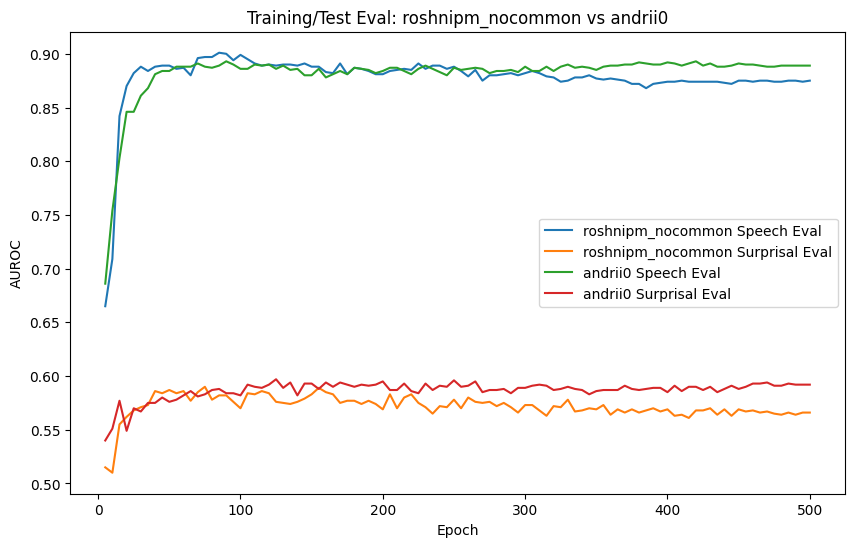

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(5, n+1, 5), roshnipm_speech_evals, label='roshnipm_nocommon Speech Eval')
plt.plot(np.arange(5, n+1, 5), roshnipm_surprisal_evals, label='roshnipm_nocommon Surprisal Eval')
plt.plot(np.arange(5, n+1, 5), andrii0_speech_evals, label='andrii0 Speech Eval')
plt.plot(np.arange(5, n+1, 5), andrii0_surprisal_evals, label='andrii0 Surprisal Eval')
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.title('Training/Test Eval: roshnipm_nocommon vs andrii0')
plt.legend()
plt.show()